In [31]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [32]:
def double_depense(a, z, n, q, premined):

   # q = hashrate de l'attaquant
   # n = nombre d'attaques
   # z = nombre de confirmations
   # a = différence entre le nb de blocks de l'attaquant et la chaine officielle permi
   # premined = nombre de blocks préminé par l'attaquant


    eAttack = 0
    eOfficiel = 0

    for attack in range(n):
        bOfficiel = 0
        bAttack = premined
        diff = 0
        is_true = True

        while(is_true == True):
            result = random.uniform(0,1) # on génère un nombre random
            if result < q:
                bAttack += 1

            else:
                bOfficiel += 1
            if bAttack >= z: # s'arrête quand on atteint le nombre de confirmations souhaitées
                eOfficiel += bAttack
                eAttack += bAttack
                break

            else:
                diff = bOfficiel - bAttack # s'arrête si la blockchain officielle à a blocks d'avance
                if diff >= a: 
                    eOfficiel += bOfficiel
                    break

    eOfficiel = eOfficiel / n

    if(eAttack > 0):

        eAttack = eAttack / n

    return eAttack/eOfficiel # retourne le rendement 

Le rendement est positif à partir de 0.0 pour z = 0
Le rendement est positif à partir de 0.0 pour z = 1
Le rendement est positif à partir de 0.005 pour z = 2
Le rendement est positif à partir de 0.14 pour z = 3
Le rendement est positif à partir de 0.24 pour z = 4
Le rendement est positif à partir de 0.305 pour z = 5
Le rendement est positif à partir de 0.34 pour z = 6
Le rendement est positif à partir de 0.37 pour z = 7
Le rendement est positif à partir de 0.385 pour z = 8
Le rendement est positif à partir de 0.4 pour z = 9


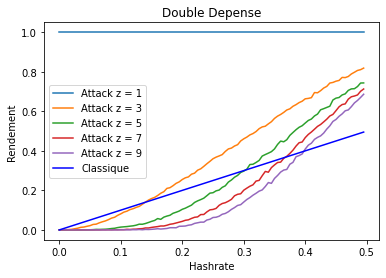

In [36]:

   
results = []

positive_rendement = False

#Attributs modifialbe pour faire des test
n = 10000
a = 3
z= 7
block_premine = 1
for z in range(0,10): 
  positive_rendement = False
  result = []
  for i in np.arange(0, 0.5, 0.005):  # hashrate allant de 0 à 0.5 avec un intervalle de 0.005
    temp = double_depense(a,z,n,i,1)
    result.append(temp)
    if temp>i:
      if not positive_rendement : # permet de savoir à partir de quand le rendement est positif
            print("Le rendement est positif à partir de " +str(i)+ " pour z = "+str(z))
            positive_rendement = True
  results.append(result)


y = np.arange(0,0.5,0.005)
y_axis = np.array(y)

plt.title('Double Depense')

plt.plot(y_axis, results[1], label = "Attack z = 1" ) 
plt.plot(y_axis, results[3], label = "Attack z = 3" ) 
plt.plot(y_axis, results[5], label = "Attack z = 5" ) 
plt.plot(y_axis, results[7], label = "Attack z = 7" ) 
plt.plot(y_axis, results[9], label = "Attack z = 9" ) 

plt.plot(y_axis,y_axis, label="Classique", color = 'blue')
plt.legend()
plt.xlabel('Hashrate')
plt.ylabel('Rendement')
plt.show()